 <h1>REGRESSIONS  AND TIME SERIES PROJECT</h1> 

In this project we will be working with a fake absenteeism at work data set, indicating whether or not a particular employee will 'Hit target'. We will try to create a model that will predict whether or not they will miss work based off the features of that employee.

This data set contains the following features:
* Reason for absence                 
* Month of absence                   
* Day of the week                    
* Seasons                            
* Transportation expense             
* Distance from Residence to Work    
* Service time                       
* Age                                
* Work load Average/day              
* Hit target                         
* Disciplinary failure               
* Education                          
* Son                                
* Social drinker                     
* Social smoker                      
* Pet                                
* Weight                             
* Height                             
* Body mass index                    
* Absenteeism time in hours 


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import sys
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [159]:
df = pd.read_csv('../../data/01_raw/Absenteeism_at_work.csv', delimiter=';')

In [160]:
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [161]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [162]:
df.shape

(740, 21)

In [163]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Exploratory Data Analysis

* For the rest of the exercise we'll only be using the numerical data of the csv file.
**Use seaborn to create a jointplot to compare the Number children an employee has and the Absenteeism time in hours columns. Does the correlation make sense?**


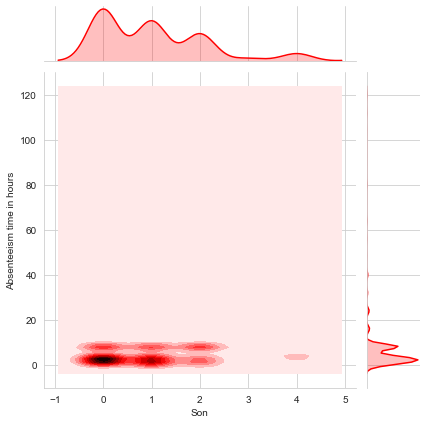

In [164]:
sns.jointplot(x='Son', y='Absenteeism time in hours', data=df, color='red', kind='kde')

In [ ]:
sns.jointplot(x='Transportation_expense', y='Absenteeism_time_in_hours', data=df, color='red', kind='kde')

# Creating a countplot for the group age of employees

Text(0.5, 0, 'Age')

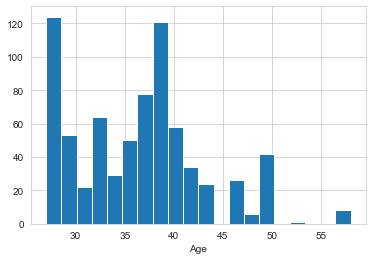

In [166]:
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

In [ ]:
# sns.pairplot(df,hue='Disciplinary failure',palette='bwr')

In [168]:
#plt.show()

In [ ]:
sns.jointplot(x='Service time',y='Hit target',data=df)

# Creating a count plot for the reasons of absence

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

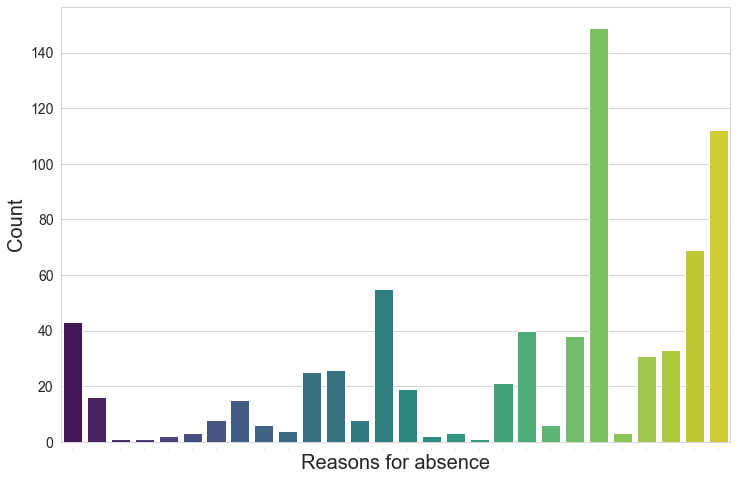

In [170]:
plt.figure(figsize=(12,8))
sns.countplot(x='Reason for absence',data=df,palette='viridis')
plt.xlabel('Reasons for absence', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

## Interpretation of some reasons of absence
* medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28)



# Creating new features

In [171]:
# df['Month'] = pd.to_datetime(df['Month of absence'])
# df['Day of Week'] = pd.to_datetime(df['Day of Week'])

In [172]:
#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
# df['Month'] = df['Month of absence'].apply(lambda time: time.month)
# df['Day of Week'] = df['Day of the week'].apply(lambda time: time.dayofweek)

In [173]:
#dmap = {1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}

In [174]:
#df['Day of the week'] = df['Day of the week'].map(dmap)

In [175]:
#dmap = {1:'summer',2:'autumn',3:'winter',4:'spring'}

In [176]:
#df['Absenteeism time in hours '] = pd.to_numeric(df['Absenteeism time in hours'])

In [177]:
#df['Seasons'] = df['Seasons'].map(dmap)

In [178]:
df['medical_consult_dummy'] = (df['Reason for absence'] == 23).astype(int)
df['dental_consult_dummy'] = (df['Reason for absence'] == 28).astype(int)
df['genitourinary_dummy'] = (df['Reason for absence'] == 14).astype(int)
dow = pd.get_dummies(df['Day of the week'])
dow.columns = ['mon_dummy', 'tue_dummy', 'wed_dummy', 'thu_dummy' ,'fri_dummy']
df = pd.concat([df, dow], axis=1)
print(df.shape)

(740, 29)


In [179]:
df.columns = df.columns.str.replace(' ', '_')  # remove spaces from column titles

In [180]:
df.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

#### Dropping rows where Absenteeism time in hours is equal or greater than 24

In [181]:
df1 = df[df['Absenteeism_time_in_hours'] < 24]
#df1.fillna(value=0, inplace=True)
df.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
medical_consult_dummy              0
dental_consult_dummy               0
genitourinary_dummy                0
mon_dummy                          0
tue_dummy                          0
wed_dummy                          0
t

In [182]:
#df1.groupby('ID')['Absenteeism_time_in_hours']

In [183]:
print(df1.shape)

(696, 29)


In [184]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

## Train-test-split

In [250]:
# removed 3 variables: the target, "reason" and "day of week" (both of which we dummied)
# removed 3 more vars: 'tue_dummy' (for collinearity issues), 'Weight', 'Height' (also for collinearity issues)
X = df1[['Month_of_absence','Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Body_mass_index', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 
       'wed_dummy', 'thu_dummy', 'fri_dummy']]

In [251]:
y = df1['Absenteeism_time_in_hours']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Examine a correlation heatmap

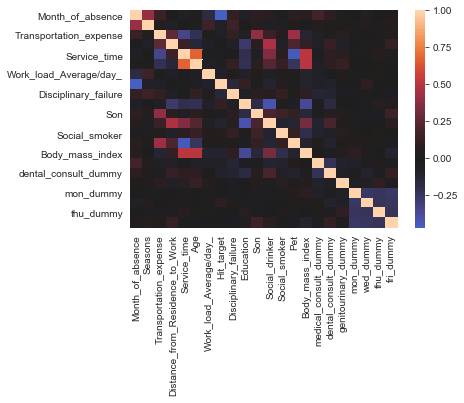

In [253]:
sns.heatmap(X.corr(), center=0)

In [254]:
abs(X.corr()) > 0.75

,Month_of_absence,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,...,Social_smoker,Pet,Body_mass_index,medical_consult_dummy,dental_consult_dummy,genitourinary_dummy,mon_dummy,wed_dummy,thu_dummy,fri_dummy
Month_of_absence,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seasons,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Transportation_expense,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance_from_Residence_to_Work,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service_time,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Work_load_Average/day_,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Hit_target,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Disciplinary_failure,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Education,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### Split `X_train` into `X_train_dummy` (for categorical variables) and `X_train_cont` (for continuous variables)

In [255]:
X_train = X_train.reset_index(drop=True)  # reset index so .concat() words
X_train.shape

(485, 22)

In [256]:
# remove 'tue_dummy'
X_train_dummy = X_train[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_train_dummy.shape

(485, 15)

In [257]:
# remove 'Weight', 'Height'
X_train_cont = X_train[['Transportation_expense','Distance_from_Residence_to_Work', 
                        'Service_time', 'Age','Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_train_cont.shape

(485, 7)

#### Split `X_test` into `X_test_dummy` (for categorical variables) and `X_test_cont` (for continuous variables)

In [258]:
X_test = X_test.reset_index(drop=True)  # reset index so .concat() works
X_test.shape

(208, 22)

In [259]:
# remove 'tue_dummy'
X_test_dummy = X_test[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_test_dummy.shape

(208, 15)

In [260]:
# remove 'Weight', 'Height'
X_test_cont = X_test[['Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age',
                      'Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_test_cont.shape

(208, 7)

#### Scale `X_train_cont` and `X_test_cont`

In [261]:
scaler = StandardScaler()

In [262]:
# fit and transform training data
scaler.fit(X_train_cont)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

In [263]:
# just transform the testing data
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

#### Combine `X_train_dummy` and `X_train_cont_scaled`

In [264]:
print(X_train_cont_scaled.shape)
print(X_train_dummy.shape)

(485, 7)
(485, 15)


In [265]:
X_train_scaled = pd.concat([X_train_dummy, X_train_cont_scaled], axis=1)
X_train_scaled.shape

(485, 22)

#### Combine `X_test_dummy` and `X_test_cont_scaled`

In [266]:
print(X_test_cont_scaled.shape)
print(X_test_dummy.shape)

(208, 7)
(208, 15)


In [267]:
X_test_scaled = pd.concat([X_test_dummy, X_test_cont_scaled], axis=1)
X_test_scaled.shape

(208, 22)

## Linear Regression

Using `X_train_scaled` and `X_test_scaled`

In [268]:
X_train_scaled.shape

(485, 22)

In [269]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

In [270]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.9313163032473155

In [271]:
r2_score(y_test, y_pred)

0.21359175193013347

#### Look at AIC/BIC using `statsmodels`

In [272]:
est = sm.OLS(list(y_train), X_train_scaled).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              53.44
Date:                Wed, 31 Jul 2019   Prob (F-statistic):                   4.73e-112
Time:                        12:25:48   Log-Likelihood:                         -1215.8
No. Observations:                 485   AIC:                                      2476.
Df Residuals:                     463   BIC:                                      2568.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Month_of_absence                    0.2185      0.054      4.071      0.000       0.113       0.324
Seasons                             0.1599      0.143      1.122      0.263      -0.120       0.440
Disciplinary_failure               -6.6585      0.648    -10.277      0.000      -7.932      -5.385
medical_consult_dummy              -2.5678      0.378     -6.798      0.000      -3.310      -1.825
dental_consult_dummy               -3.1759      0.413     -7.687      0.000      -3.988      -2.364
genitourinary_dummy                -0.1665      0.963     -0.173      0.863      -2.060       1.727
mon_dummy                           1.0212      0.428      2.387      0.017       0.181       1.862
wed_dummy                           0.8421      0.422      1.994      0.047       0.012       1.672
thu_dummy                           0.6013      0.441      1.363      0.173      -0.265       1.468
fri_dummy                           0.1646      0.426      0.387      0.699      -0.672       1.001
Social_drinker                      2.3243      0.348      6.680      0.000       1.641       3.008
Social_smoker                       1.1558      0.598      1.932      0.054      -0.020       2.331
Education                           0.9709      0.198      4.897      0.000       0.581       1.361
Son                                 0.6020      0.139      4.337      0.000       0.329       0.875
Pet                                 0.0910      0.142      0.639      0.523      -0.189       0.371
Transportation_expense              0.3935      0.174      2.261      0.024       0.051       0.736
Distance_from_Residence_to_Work    -0.5194      0.197     -2.641      0.009      -0.906      -0.133
Service_time                        0.0592      0.254      0.233      0.816      -0.440       0.559
Age                                -0.3781      0.222     -1.706      0.089      -0.814       0.057
Work_load_Average/day_              0.2983      0.153      1.954      0.051      -0.002       0.598
Hit_target                          0.0109      0.166      0.066      0.947      -0.315       0.337
Body_mass_index                     0.2120      0.197      1.077      0.282      -0.175       0.599
==============================================================================
Omnibus:                      114.134   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.641
Skew:                           1.165   Prob(JB):                     4.69e-64
Kurtosis:                       6.001   Cond. No.                         54.9
==============================================================================

Warnings:

In [273]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('../../results/ols_results_1.tex', 'w')
f.write(beginningtex)
f.write(est.summary().as_latex())
f.write(endtex)
f.close()

## Linear Regression w/ RFE

Recursive feature elimination

Using `X_train_scaled` and `y_train` to choose the top 15 most important features

In [274]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X_train_scaled, y_train)

In [275]:
top_15_cols = X.columns[selector.support_]
X_train_scaled_t15 = X_train_scaled[top_15_cols]
X_test_scaled_t15 = X_test_scaled[top_15_cols]
X_test_scaled_t15.columns

Index(['Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Disciplinary_failure', 'Education', 'Son',
       'Social_drinker', 'Social_smoker', 'Pet', 'Body_mass_index',
       'medical_consult_dummy', 'dental_consult_dummy', 'mon_dummy',
       'thu_dummy'],
      dtype='object')

In [276]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled_t15, y_train)
y_pred = linreg.predict(X_test_scaled_t15)

In [277]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.889169162064151

In [278]:
r2_score(y_test, y_pred)

0.2360434929514722

#### Look at AIC/BIC using `statsmodels`

In [279]:
est = sm.OLS(list(y_train), X_train_scaled_t15).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.688
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              69.23
Date:                Wed, 31 Jul 2019   Prob (F-statistic):                   1.34e-108
Time:                        12:26:01   Log-Likelihood:                         -1239.6
No. Observations:                 485   AIC:                                      2509.
Df Residuals:                     470   BIC:                                      2572.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation_expense              0.3258      0.178      1.829      0.068      -0.024       0.676
Distance_from_Residence_to_Work    -0.7182      0.194     -3.702      0.000      -1.099      -0.337
Service_time                       -0.0114      0.260     -0.044      0.965      -0.522       0.500
Age                                -0.3891      0.228     -1.704      0.089      -0.838       0.060
Disciplinary_failure               -5.7697      0.647     -8.914      0.000      -7.042      -4.498
Education                           1.6044      0.161      9.982      0.000       1.289       1.920
Son                                 0.7829      0.139      5.642      0.000       0.510       1.056
Social_drinker                      3.0838      0.339      9.098      0.000       2.418       3.750
Social_smoker                       1.1829      0.621      1.904      0.058      -0.038       2.404
Pet                                 0.3262      0.142      2.294      0.022       0.047       0.606
Body_mass_index                     0.3751      0.202      1.860      0.064      -0.021       0.771
medical_consult_dummy              -1.7354      0.368     -4.720      0.000      -2.458      -1.013
dental_consult_dummy               -2.4966      0.407     -6.128      0.000      -3.297      -1.696
mon_dummy                           0.8920      0.377      2.364      0.018       0.151       1.633
thu_dummy                           0.3827      0.394      0.972      0.331      -0.391       1.156
==============================================================================
Omnibus:                       96.285   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.486
Skew:                           1.034   Prob(JB):                     5.94e-48
Kurtosis:                       5.547   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('../../results/ols_results_2.tex', 'w')
f.write(beginningtex)
f.write(est.summary().as_latex())
f.write(endtex)
f.close()

## Linear regression with 12 features we selected

In [214]:
top_12_cols = ['Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 
       'Education', 'Son', 'Social_drinker',
       'Pet', 'Body_mass_index', 'medical_consult_dummy',
       'mon_dummy', 
       'fri_dummy']
len(top_12_cols)

12

In [215]:
est = sm.OLS(list(y_train), X_train_scaled[top_12_cols]).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              66.73
Date:                Wed, 31 Jul 2019   Prob (F-statistic):                    8.17e-94
Time:                        10:23:21   Log-Likelihood:                         -1289.4
No. Observations:                 487   AIC:                                      2603.
Df Residuals:                     475   BIC:                                      2653.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation_expense              0.4714      0.193      2.445      0.015       0.092       0.850
Distance_from_Residence_to_Work    -0.4800      0.213     -2.259      0.024      -0.898      -0.062
Service_time                       -0.1126      0.280     -0.402      0.688      -0.663       0.438
Age                                -0.5089      0.243     -2.091      0.037      -0.987      -0.031
Education                           1.7000      0.173      9.831      0.000       1.360       2.040
Son                                 0.6660      0.156      4.283      0.000       0.360       0.972
Social_drinker                      2.0981      0.356      5.893      0.000       1.398       2.798
Pet                                 0.0844      0.136      0.620      0.535      -0.183       0.352
Body_mass_index                     0.4233      0.208      2.038      0.042       0.015       0.832
medical_consult_dummy              -0.9487      0.379     -2.500      0.013      -1.694      -0.203
mon_dummy                           1.0408      0.403      2.580      0.010       0.248       1.834
fri_dummy                          -0.2673      0.409     -0.653      0.514      -1.071       0.537
==============================================================================
Omnibus:                       59.610   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.705
Skew:                           0.815   Prob(JB):                     3.32e-20
Kurtosis:                       4.328   Cond. No.                         6.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled[top_12_cols], y_train)
y_pred = linreg.predict(X_test_scaled[top_12_cols])

np.sqrt(mean_squared_error(y_test, y_pred))

3.3105601888364804

## Lasso Regularization

In [217]:
from sklearn.linear_model import LassoCV, Ridge

lasso = LassoCV(eps=0.001)
lasso.fit(X_train_scaled, y_train)
print('Training r^2:', lasso.score(X_train_scaled, y_train))
print('Testing r^2:', lasso.score(X_test_scaled, y_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled))))

Training r^2: 0.37196469460914516
Testing r^2: 0.2536657949145882
Training RMSE: 2.7500195599991333
Testing RMSE: 2.9124184286062373


c:\users\joey\learn-env2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## K-folds cross validation

In [218]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
# scores.append(model1.score(X_test, y_test))
np.mean(cross_val_score(linreg, X, y, cv=10))

0.20184050151872251

In [219]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
# scores.append(model1.score(X_test, y_test))
np.mean(np.sqrt(np.negative(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))))

2.935261948264028

## Time series analysis

In [220]:
df1.shape

(696, 29)

#### More data cleaning

In [223]:
df1 = df1[df1.Month_of_absence != 0].copy()  # drop rows where month is 0
dmap = {2:'mon', 3:'tue', 4:'wed', 5:'thu', 6:'fri'}
df1['dow_label'] = df1.Day_of_the_week.map(dmap)

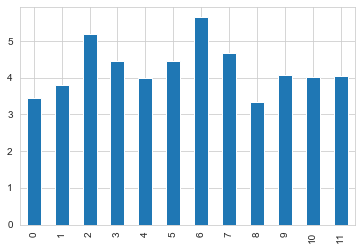

In [224]:
monthly_absent = df1.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().reset_index()#.plot(kind='bar')
monthly_absent.columns = ['month', 'avg_hr_absent']
monthly_absent.avg_hr_absent.plot(kind='bar')#head()

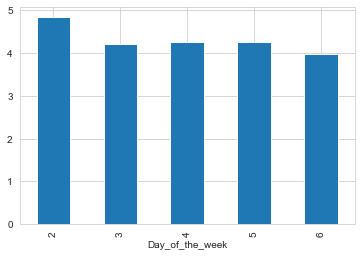

In [227]:
# dow_all = df1[['Day_of_the_week', 'Absenteeism_time_in_hours']]
dow_all = df1.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean()#.reset_index()#.plot(kind='bar')
dow_all.plot(kind='bar')#head()

#### Look at seasonal decomposition

In [230]:
avg_absent_by_month_dow = df1.groupby(['Month_of_absence', 'Day_of_the_week', 'dow_label'])['Absenteeism_time_in_hours'].mean().reset_index()#.mean()
# dow_id_all = dow_id_all.drop('Day_of_the_week', axis=1)
print(avg_absent_by_month_dow.shape)
avg_absent_by_month_dow.head(1)

(60, 4)


,Month_of_absence,Day_of_the_week,dow_label,Absenteeism_time_in_hours
0,1,2,mon,3.2


<Figure size 432x288 with 0 Axes>

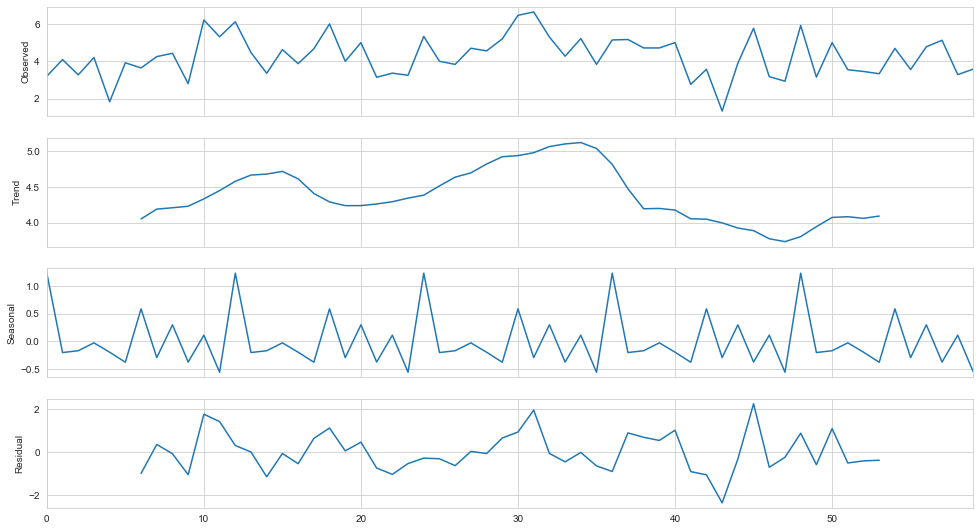

In [231]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(avg_absent_by_month_dow['Absenteeism_time_in_hours'], freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

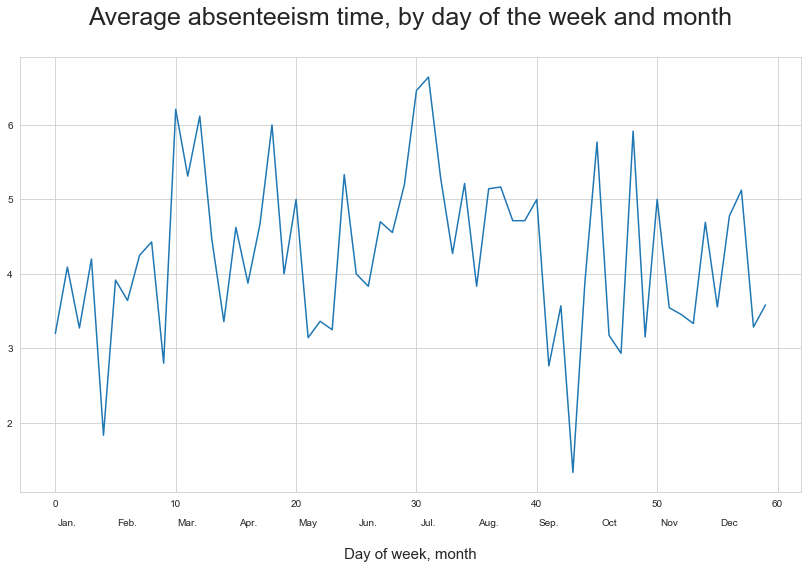

In [244]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

xticks_minor = list(range(1, 61, 5))

ax.plot(avg_absent_by_month_dow.index, avg_absent_by_month_dow.Absenteeism_time_in_hours)
# ax.set_xlabel('Month_day_of_the_week')
# ax.set_xticks(range(0,61))
# ax.set_xticklabels(np.array(['M', 'T', 'W', 'Th', 'F'] * 12))
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(np.array(['\n\nJan.', '\n\nFeb.', '\n\nMar.', '\n\nApr.', '\n\nMay', 
                             '\n\nJun.', '\n\nJul.', '\n\nAug.', '\n\nSep.', '\n\nOct', 
                             '\n\nNov', '\n\nDec'] * 12), minor=True)
ax.set_title('Average absenteeism time, by day of the week and month\n', size=25)
ax.set_xlabel('\n Day of week, month \n', size=15)
plt.show()

## Logistic regression

In [ ]:
# Group by month/day and take the average

In [245]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,693.0,18.025974,11.095847,1.000,9.000,18.000,28.000,36.000
Reason_for_absence,693.0,19.683983,8.378147,0.000,13.000,23.000,27.000,28.000
Month_of_absence,693.0,6.337662,3.429510,1.000,3.000,6.000,9.000,12.000
Day_of_the_week,693.0,3.956710,1.421705,2.000,3.000,4.000,5.000,6.000
Seasons,693.0,2.536797,1.116295,1.000,2.000,3.000,4.000,4.000
Transportation_expense,693.0,221.600289,66.421651,118.000,179.000,225.000,260.000,388.000
Distance_from_Residence_to_Work,693.0,29.874459,14.875693,5.000,16.000,26.000,50.000,52.000
Service_time,693.0,12.493506,4.437951,1.000,9.000,12.000,16.000,29.000
Age,693.0,36.326118,6.405640,27.000,31.000,37.000,40.000,58.000
Work_load_Average/day_,693.0,270.577130,38.438426,205.917,244.387,264.249,284.853,378.884


** Diciplinary faillure is our target for the logistic regression **

In [246]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy', 'dow_label'],
      dtype='object')

In [174]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, solver='lbfgs')
feature_cols = ['Absenteeism_time_in_hours']
# X = df1[feature_cols]
# y = df1['Hit_target']
# logreg.fit(X, y)
# df1['Absenteeism_time_in_hours'] = logreg.predict(X)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [178]:
# plt.scatter(X, y)
# #plt.plot(X, y, color='red')
# plt.xlabel('Absenteeism_time_in_hours')
# plt.ylabel('Hit_target')

In [162]:
df1['target_dummy'] = (df1['Hit_target'] > 98).astype(int)

In [163]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy', 'dow_label', 'target_dummy'],
      dtype='object')

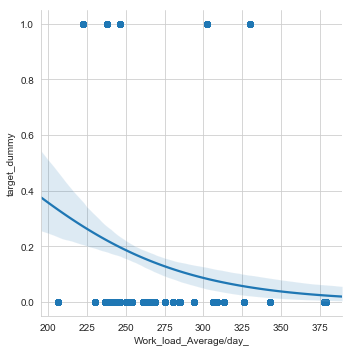

In [164]:
sns.lmplot(x='Work_load_Average/day_', y='target_dummy', data=df1, logistic=True)

In [ ]:
df1['forecast'] = res.predict(start=54, end=72, dynamic=False)
monthly_sales[['payment_amount', 'forecast']].plot(figsize=(16, 12))

In [118]:
dow_id_all = df1.groupby(['ID', 'Day_of_the_week', 'dow_label'])['Absenteeism_time_in_hours'].sum().reset_index()#.mean()
# dow_id_all = dow_id_all.drop('Day_of_the_week', axis=1)
print(dow_id_all.shape)
dow_id_all.head(10)

(139, 4)


,ID,Day_of_the_week,dow_label,Absenteeism_time_in_hours
0,1,2,mon,39
1,1,3,tue,22
2,1,4,wed,9
3,1,5,thu,24
4,1,6,fri,27
5,2,2,mon,9
6,2,5,thu,8
7,2,6,fri,8
8,3,2,mon,107
9,3,3,tue,54


In [119]:
len(dow_id_all.ID.unique())

34

In [120]:
df_base = pd.DataFrame({'ID':np.repeat(dow_id_all.ID.unique(), 5), 'Day_of_the_week':np.array(list(range(2,7)) * 34)})
df_merge = pd.merge(df_base, dow_id_all, how='left', on=['ID', 'Day_of_the_week']).fillna(0)

In [121]:
print(df_base.shape)
print(df_merge.shape)

(170, 2)
(170, 4)
